# 1. OpenCV-Python 시작하기

## 1) 영상파일 불러와서 출력하기

In [3]:
import cv2
import sys

print("Hello, OpenCV", cv2.__version__)

image = cv2.imread('./images/cat.bmp')  # cat.bmp 파일을 불러와서 image 변수에 할당

if image is None:  # 이미지가 경로에 없을 경우(불러오기 실패)
    print('Image load Failed!')  # 사용자 정의 에러 메세지 출력
    sys.exit()  # 파이썬 프로그램 종료

cv2.namedWindow('image')  # "image"라는 이름의 새 가상윈도우 창을 만든다.
cv2.imshow('image', image)  # 이 창에 image 영상을 출력한다.
cv2.waitKey()  # 키보드 입력을 받을때 까지 기다린다.
# 키보드 입력을 받았을 때
cv2.destroyAllWindows()  # 생성된 가상윈도우 창을 닫음
cv2.waitKey(1)
'''
NOTE : MAC OS 에서 OpenCV window를 닫기 위해 위 줄 처럼
cv2.destroyAllWindows() 함수를 실행해도 닫히지 않는 문제가 있다.
이를 해결하기 위해서 함수 아래에 cv2.waitKey(1)를 선언해주면
정상적으로 종료되는 것을 확인할 수 있다.
'''

Hello, OpenCV 4.5.4-dev


'\nNOTE : MAC OS 에서 OpenCV window를 닫기 위해 위 줄 처럼\ncv2.destroyAllWindows() 함수를 실행해도 닫히지 않는 문제가 있다.\n이를 해결하기 위해서 함수 아래에 cv2.waitKey(1)를 선언해주면 정상적으로 종료되는 것을 확인할 수 있다.\n'

## 2) OpenCV 주요 함수 설명

### OpenCV API 도움말 찾기
- OpenCV 최신 도움말 : <a href="https://docs.opencv.org/master"/>https://docs.opencv.org/master</a>
- OpenCV 도움말 사이트에서 우측 상단 검색창 활용

### 영상 파일 불러오기

In [ ]:
import cv2
help(cv2.imread)

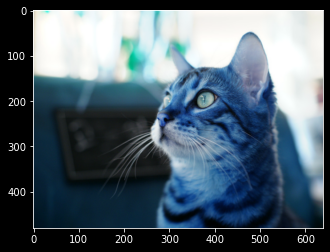

((480, 640, 3), dtype('uint8'))

In [39]:
# cv2.imread(filename, flags) -> retval
# filename : 불러올 영상 파일의 경로와 이름(+확장자)을 문자열로 입력
# flags : 영상 파일 불러오기 옵션
#       : cv2.IMREAD_COLOR -> BGR 컬러 영상으로 읽기(기본값) / shape = (rows, cols, 3)
#       : cv2.IMREAD_GRAYSCALE -> grayscalse 영상으로 읽기 / shape = (rows, cols)
#       : cv2.IMREAD_UNCHANGED -> 영상 파일 속성 그대로 읽기 / ex) 투명한 PNG 파일 : shape = (rows, cols, 4)
# retval : return value. 불러온 영상 데이터(numpy.ndarray)

import cv2
import matplotlib.pyplot as plt

# "cat.bmp"라는 영상 파일을 불러온 후 출력해보기
# flags에 아무값도 전달하지 않으면 기본값인 BGR 컬러로 읽는다.
image = cv2.imread('./images/cat.bmp')
plt.imshow(image)
plt.show()

# .shape 는 행렬의 순서로 나타내기 때문에 480,640,3 으로 표현 되는 것을 볼 수 있다.
# 480행 : 480px 높이 / 640열 : 640px 너비 / 3채널(RGB)
# 기본적으로 image 데이터의 값은 numpy.ndarray(uint8)의 형태로 저장된다.
image.shape, image.dtype

### 영상 파일 출력하기

In [ ]:
import cv2
help(cv2.imshow)

In [9]:
# cv2.imshow(winname, mat) -> None
# winname : window name. 영상을 출력할 대상 창 이름
# mat : matrix. 출력할 영상 데이터(numpy.ndarray)
# 참고사항 : uint16, int32 자료형 행렬의 경우, 행렬 원소 값을 255로 나눠서 출력
#        : float32, float64 자료형 행렬의 경우, 행렬 원소 값에 255를 곱해서 출력
#        : 만약 위 자료형의 영상 파일을 출력하고 싶다면 자료형을 uint8로 변환 후 
#        : 출력하는 것이 안전하게 코딩하는 방법
#        : 만약 winname에 해당하는 창이 없으면 창을 새로 만들어서 영상을 출력함
#        : Windows 운영체제에서는 Ctrl + C (복사), Ctrl + S (저장) 지원
#        : 실제로는 cv2.waitKey() 함수를 호출해야 화면에 영상이 나타남

import cv2

# 가상 윈도우 창의 이름을 지정하지 않고 출력하기
image = cv2.imread('./images/cat.bmp')
cv2.imshow('', image)  # 창 이름을 입력하지 않을 시 이름 없는 새 창을 생성한다.
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

### 영상 파일 저장하기

In [ ]:
import cv2
help(cv2.imwrite)

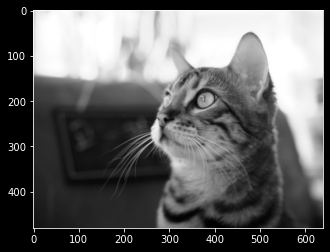

In [66]:
# cv2.imwrite(filename, img, params) -> retval
# filename : 저장할 영상 파일의 경로와 이름(+확장자)을 문자열로 입력
# img : image. 저장할 영상 데이터(numpy.ndarray)
# params : 파일 저장 옵션 지정(속성 & 값의 정수 쌍)
#        : ex) [cv2.IMWRITE_JPEG_QUALITY, 90] -> JPG 파일 압축률을 90%로 지정
# retval : return value. 정상적으로 저장하면 True, 실패하면 False

import cv2
import matplotlib.pyplot as plt

## 이미지(영상) 파일을 grayscale로 불러와 "cat_gray.png"라고 저장한 후 다시 불러와 출력하기
image = cv2.imread('./images/cat.bmp', cv2.IMREAD_GRAYSCALE)
cv2.imwrite('./images/cat_gray.png', image)

image_gray = cv2.imread('./images/cat_gray.png')

plt.imshow(image_gray)
plt.show()

### 새 창 띄우기 / 창 닫기 / 창 위치 이동 / 창 크기 변경 / 키보드 입력 대기

In [ ]:
import cv2
help(cv2.namedWindow)

In [ ]:
import cv2
help(cv2.destroyWindow)

In [ ]:
import cv2
help(cv2.destroyAllWindows)

In [ ]:
import cv2
help(cv2.moveWindow)

In [ ]:
import cv2
help(cv2.resizeWindow)

In [ ]:
import cv2
help(cv2.waitKey)

In [8]:
# cv2.namedWindow(windname, flags) -> retval
# winname : window name. 창 고유 이름을 문자열로 입력
# flags : 창 속성 지정 플래그
#       : cv2.WINDOW_NORMAL -> 영상 크기를 창 크기에 맞게 지정
#       : cv2.WINDOW_AUTOSIZE -> 창 크기를 영상 크기에 맞게 변경(기본값)

# cv2.destroyWindow(winname) -> None
# cv2.destroyAllWindows() -> None
# winname : window name. 닫고자 하는 창 이름
# 참고사항 : destroyWindow() 함수는 지정한 창 하나만 닫고,
#        : destroyAllWindows() 함수는 열려있는 모든 창을 닫는다.

# cv2.moveWindow(winname, x, y) -> None
# winname(window name) : 창 이름
# x : 이동할 위치 x 좌표(화면 왼쪽위 기준)
# y : 이동할 위치 y 좌표(화면 왼쪽위 기준)

# cv2.resizeWindow(winname, width, height) -> None
# winname : window name. 창 이름
# width : 변경할 창의 가로 크기
# height : 변경할 창의 세로 크기
# 참고사항 : 창 생성 시 cv2.WINDOW_NORMAL 속성으로 생성되어야 동작한다.
#        : 제목 표시줄, 창 경계는 고려되지 않고, 영상 출력 부분의 크기만을 고려한다.

# cv2.waitKey(delay) -> retval
# delay : 밀리초 단위 대기 시간. delay ≤ 0 이면 무한히 기다린다. 기본값은 0
# retval : return value. 눌린 키 값(ASCII code), 키가 눌리지 않으면 -1
# 참고사항 : cv2.waitKey() 함수는 OpenCV 창이 하나라도 있을 때 동작한다.
#        : 특정 키 입력을 받으려면 ord() 함수를 이용하면 된다.
#        : 주요 특수키 코드 -> 27(esc, \x1b), 13(enter, \r), 9(tab, \t)
#        : ord() -> 문자열을 아스키 코드로 반환 / chr() -> 숫자를 아스키 코드로 반

import cv2

## "cat.bmp" 영상 파일을 불러온 후, x와 y 방향으로 각 200px씩 이동하고, 창 크기를 가로 세로 각 100px씩 키운다.
## 이후 TAB 키를 입력 받았을 때만 창을 종료 시킨다.
image = cv2.imread('./images/cat.bmp')
cv2.namedWindow('cat', flags=cv2.WINDOW_NORMAL)
cv2.moveWindow('cat', 200, 200)  # 화면의 왼쪽 위 기준 오른쪽으로 200만큼, 아래로 200만큼 창을 움직인다.
cv2.imshow('cat', image)
cv2.resizeWindow('cat', 740, 580)  # 너비와 높이를 100px씩 키운다.
while True:
    if cv2.waitKey() == ord('\t'):  # TAB 키를 입력했을 때 반복문을 탈출한다.
        break
cv2.destroyWindow('cat')
cv2.waitKey(1)

-1

## 3) matplotlib 사용하여 영상 출력하기

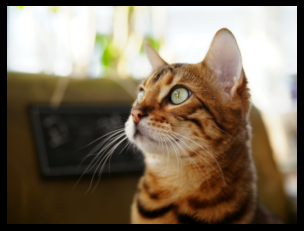

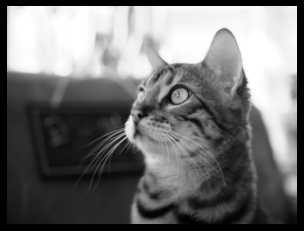

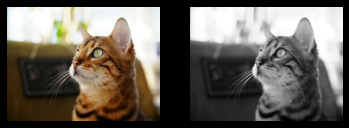

In [9]:
# matplotlib 라이브러리 : 함수 그래프, 차트, 히스토그램 등의 다양한 그리기 기능을 제공하는 파이썬 패키지
# 컬러 영상 출력 : opencv와 상반 되게 matplotlib 패키지는 컬러 영상의 색상 정보를 RGB 순서로 인식한다.
#            : 하지만 cv2.imread() 함수로 불러온 영상의 색상 정보는 BGR 순서이므로 
#            : 이를 RGB 순서로 변경해주지 않으면 영상 출력이 이상하게 된다.
#            : 아를 보완하기 위해서 cv2.cvtColor() 함수를 이용하여 색상 정보 순서를 RGB로 변경해주면
#            : 정상적으로 영상을 출력한다.
# 그레이스케일 영상 출력 : matplotlib.pyplot 클래스의 함수 imshow() 함수에서 컬러맵을 cmap="gray"로 지정

import matplotlib.pyplot as plt
import cv2

# 컬러 영상 출력
image_BGR = cv2.imread('./images/cat.bmp')
image_RGB = cv2.cvtColor(image_BGR, cv2.COLOR_BGR2RGB)  # 색상 정보의 순서를 BGR -> RGB로 바꿈

plt.axis('off')  # 축 정보 끄기
plt.imshow(image_RGB)
plt.show()

# 그레이스케일 영상 출력
image_GRAY = cv2.imread('./images/cat.bmp', cv2.IMREAD_GRAYSCALE)

plt.axis('off')  # 축 정보 끄기
plt.imshow(image_GRAY, cmap='gray')
plt.show()

# 두 개의 영상을 함께 출력
plt.subplot(121), plt.axis('off'), plt.imshow(image_RGB)
plt.subplot(122), plt.axis('off'), plt.imshow(image_GRAY, cmap='gray')
plt.show()

## 4) 이미지 슬라이드 쇼

In [ ]:
'''
## 구현할 기능
# 1. 특정 폴더에 있는 이미지 파일 목록 읽기
# 2. 이미지를 전체 화면으로 출력하기
# 3. 일정 시간동안 이미지를 화면에 출력하고, 다음 이미지로 교체하기(무한루프)

import cv2

## 특정 폴더에 있는 이미지 파일(*.jpg) 목록 읽기

# 방법 1
import os
file_list = os.listdir('./images/slideshow')
image_files = [file for file in file_list if file.endswith('.jpg')]
print(image_files, type(image_files), sep='\n\n')

print('-'*50)

# 방법 2
import glob
image_files = glob.glob('./images/slideshow/*.jpg')
print(image_files, type(image_files), sep='\n\n')

#### 나의 pick : 방법 2 - 작성해야할 실행문이 두 번에서 한 번으로 줄어드는 것으로 보아
####          : 일반적으로 이 방법이 더욱 효율적으로 보인다.

## 전체 화면 영상 출력 창 만들기
cv2.namedWindow('slideshow', cv2.WINDOW_NORMAL)
cv2.setWindowProperty('slideshow', cv2.WND_PROP_FULLSCREEN, cv2.WINDOW_FULLSCREEN)

## 불러온 영상을 반복적으로 출력하기
count = len(image_files)
index = 0

while True:
    image = cv2.imread(image_files[index])
    
    if image is None:
        print('Image load failed!')
        break
    
    cv2.imshow('slideshow', image)
    # 키보드의 아무키나 눌러도 그에 해당하는 아스키 값은 0보다 크기 때문에
    # 아래 if 조건문이 작동되고 루프를 탈출한다.
    if cv2.waitKey(1000) >= 0:  # 임의의 키보드 자판을 누를 시
        break
    
    index += 1
    if index >= count:
        index = 0
        
cv2.destroyAllWindows()
cv2.waitKey(1)
'''
#### TODO : 맥북에서 cv2.setWindowProperty() 함수를 이용하여 전체 화면으로 영상을 출력하면
#         : 가상 윈도우 창이 닫히지 않고, 심지어 다른 화면으로 이동조차 불가하다.
#         : 무엇이 문제인지 구글링을 통해 알아보아도 나오질 않는다.
#         : 많이 심각한 것은 아니지만 찝찝하다. 해결 방안 모색 필요함.

# 2. OpenCV-Python 기초 사용법

## 1) 영상의 속성과 픽셀 값 참조

### Table
|OpenCV 자료형(1채널)|NumPy 자료형|구분|
|:-|:-|:-|
|cv2.CV_8U|numpy.uint8|8비트 부호 없는 정수|
|cv2.CV_8S|numpy.int8|8비트 부호 있는 정수|
|cv2.CV_16U|numpy.uint16|16비트 부호 없는 정수|
|cv2.CV_16S|numpy.int16|16비트 부호 있는 정수|
|cv2.CV_32S|numpy.int32|32비트 부호 있는 정수|
|cv2.CV_16F|numpy.float16|16비트 부동소수형|
|cv2.CV_32F|numpy.float32|32비트 부동소수형|
|cv2.CV_64F|numpy.float64|64비트 부동소수형|

- 그레이스케일 영상 : cv2.CV_8UC1(8비트 부호 없는 정수이고, 채널이 1개이다.) -> numpy.uint8, shape = (h, w)
- 컬러 영상 : cv2.CV_8UC3(8비트 부호 없는 정수이고, 채널이 3개이다.) -> numpy.uint8, shape = (h, w, 3)

In [13]:
# OpenCV는 영상 데이터를 numpy.ndarray로 표현한다.
# 영상 데이터를 표현하는 속성들 :
#                   ndim : 차원 수를 의미. 
#                        : ex) 그레이스케일 영상은 h, w 2차원이고,
#                        : 컬러 영상은 h, w, 3 으로 3차원의 형태이다.
#                  shape : 각 차원의 크기를 의미.
#                   size : 전체 원소의 개수를 의미.
#                  dtype : 원소의 데이터 타입을 의미.
#                        : 일반적인 영상 데이터는 1px 당 1byte로 색상 정보를
#                        : 표현하기 때문에 uint8 타입을 가진다.
# 참고사항 : numpy.ndarray -> NumPy에서 사용하는 차원이 n개인 행렬

import cv2

# 이미지 불러오기
image1 = cv2.imread('./images/cat.bmp', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./images/cat.bmp')  # default 값이 cv2.IMREAD_COLOR 이기 때문에 생략

# 출력
print('image1 type :', type(image1))
print('-'*50)
print('image1 shape :', image1.shape)
print('image2 shape :', image2.shape)
print('-'*50)
print('image1 dtype :', image1.dtype)
print('image2 dtype :', image2.dtype)

print('-'*50)

# 차원 정보 분리
h, w = image1.shape
print(f'image1 size w x h = {w} x {h}')
h, w = image2.shape[:2]
print(f'image2 size w x h = {w} x {h}')

print('-'*50)

# if len(image1.shape) == 2:
#     print('image1 is a grayscale image')
if image1.ndim == 2:
    print('image1 is a grayscale image')

print('-'*50)

# 원하는 위치의 픽셀 값 불러오기
x = 20
y = 10
pixel1 = image1[y, x]
pixel2 = image2[y, x]
print(pixel1)
print('[B G R] =', pixel2)

image1 type : <class 'numpy.ndarray'>
--------------------------------------------------
image1 shape : (480, 640)
image2 shape : (480, 640, 3)
--------------------------------------------------
image1 dtype : uint8
image2 dtype : uint8
--------------------------------------------------
image1 size w x h = 640 x 480
image2 size w x h = 640 x 480
--------------------------------------------------
image1 is a grayscale image
--------------------------------------------------
238
[B G R] = [237 242 232]


## 2) 영상의 생성, 복사, 부분 영상 추출

In [ ]:
import numpy as np
help(np.empty)

In [ ]:
import numpy as np
help(np.zeros)

In [ ]:
import numpy as np
help(np.ones)

In [ ]:
import numpy as np
help(np.full)

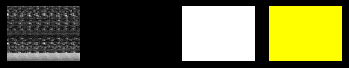

In [21]:
## 지정한 크기로 새 영상 생성하기
# numpy.empty(shape=(h, w, ch), dtype, ...) -> ndarray
# numpy.zeros(shape=(h, w, ch), dtype, ...) -> ndarray
# numpy.ones(shape=(h, w, ch), dtype, ...) -> ndarray
# numpy.full(shape=(h, w, ch), fill_value, dtype, ...) -> ndarray

# shape : 각 차원의 크기 - (h, w) or (h, w, ch)
# dtype : data type. 원소의 데이터 타입. 일반적인 영상이면 numpy.uint8 지정
# ndarray : n dimention array. 생성된 영상(numpy.ndarray)
# 참고사항 :
#       - numpy.empty() 함수는 임의의 값으로 초기화된 배열을 생성
#       - numpy.zeros() 함수는 0으로 초기화된 배열을 생성
#       - numpy.ones() 함수는 1로 초기화된 배열을 생성
#       - numpy.full() 함수는 정의된 fill_value로 초기화된 배열을 생성

## 4가지 함수를 각각 사용하여 배열을 생성하여 출력하기
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 새 영상 생성
image1 = np.empty((480, 640), np.uint8)
image2 = np.zeros((480, 640, 3), np.uint8)
image3 = np.ones((480, 640, 3), np.uint8) * 255
image4 = np.full((480, 640, 3), (0, 255, 255), np.uint8)

# 색상 정보 순서 변경
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
image3 = cv2.cvtColor(image3, cv2.COLOR_BGR2RGB)
image4 = cv2.cvtColor(image4, cv2.COLOR_BGR2RGB)

# 출력
plt.subplot(141), plt.axis('off'), plt.imshow(image1)  # grayscale image
plt.subplot(142), plt.axis('off'), plt.imshow(image2)  # true color image
plt.subplot(143), plt.axis('off'), plt.imshow(image3)  # white image
plt.subplot(144), plt.axis('off'), plt.imshow(image4)  # yellow image
plt.show()

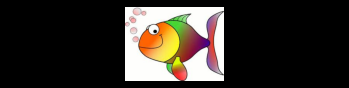

In [32]:
## 영상 복사하기
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('./images/HappyFish.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = image1.copy()

# 이 방법은 만일 image3에 변경사항이 생기면 image1까지 함께 변경되기 때문에 권장하지 않음
image3 = image1
image3.fill(0)

plt.subplot(131), plt.axis('off'), plt.imshow(image1)
plt.subplot(132), plt.axis('off'), plt.imshow(image2)
plt.subplot(133), plt.axis('off'), plt.imshow(image3)
plt.show()

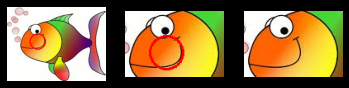

In [41]:
## 부분 영상 추출하기
import cv2
import matplotlib.pyplot as plt

image1 = cv2.imread('./images/HappyFish.jpg')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

image2 = image1[40:120, 30:150]  # h에서 80만큼, w에서 120만큼 슬라이싱

image3 = image1[40:120, 30:150].copy()

# image2.fill(0)  # image1 에도 영향이 가기 때문에 image1에 마치 모자이크 한 듯한 영상이 연출된다.

# opencv에서 제공하는 cv2.circle() 함수를 이용하여 내가 원하는 위치에 원하는 원을 그려 넣을 수도 있다.
# 인수를 전달 받는 매개변수는 순서대로 영상, 원의 중심점 위치, 반지름, 색상, 두께, 외곽선 타입, etc.
cv2.circle(image2, center=(50, 50), radius=20, color=(255, 0, 0), thickness=2)

plt.subplot(131), plt.axis('off'), plt.imshow(image1)
plt.subplot(132), plt.axis('off'), plt.imshow(image2)
plt.subplot(133), plt.axis('off'), plt.imshow(image3)
plt.show()

## 3) 마스크 연산과 ROI

In [ ]:
import cv2
help(cv2.copyTo)

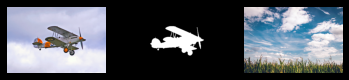

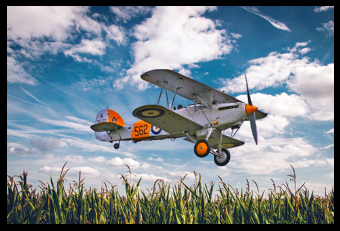

In [13]:
## ROI
#   - Region of Interest(관심 영역)
#   - 영상에서 특정 연산을 수행하고자 하는 임의의 부분 영역

## 마스크 연산
#   - OpenCV는 일부 함수에 대해 ROI연산을 지원하며, 이 때 마스크 영상을 인수로 함께 전달해야 한다.
#     -> 함수 예) cv2.copyTo(), cv2.calcHist(), cv2.bitwise_or(), cv2.matchTemplate(), etc.
#   - 마스크 영상은 cv2.CV_8UC1 타입(그레이스케일 영상)이다.
#   - 마스크 영상의 픽셀 값이 0이 아닌 위치에서만 연산이 수행된다.
#     -> 보통 마스크 영상으로는 0 또는 255로 구성된 이진 영상(binary image)을 사용한다.

## 마스크 연산을 지원하는 픽셀 값 복사 함수
# cv2.copyTo(src, mask, dst) -> dst
# src : source matrix. 입력 영상. 영상 파일의 경로와 파일 이름 등의 정보를 함축한다.
# mask : 마스크 영상. cv2.CV_8U(numpy.uint8)
#      : 0이 아닌 픽셀에 대해서만 복사 연산을 수행
# dst : destination matrix. 출력 영상. 만약 src와 크기 및 타입이 같은 dst를 입력으로 지정하면
#     : dst를 새로 생성하지 않고 연산을 수행한다.
#     : 그렇지 않으면 dst를 새로 생성하여 연산을 수행한 후 반환한다.

import cv2
import matplotlib.pyplot as plt

## 마스크 연산 수행하기 1

# 이미지 불러오기
source = cv2.imread('./images/airplane.bmp')
mask_ = cv2.imread('./images/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)
destination = cv2.imread('./images/field.bmp')

# 색상 정보 순서 변경
source = cv2.cvtColor(source, cv2.COLOR_BGR2RGB)
destination = cv2.cvtColor(destination, cv2.COLOR_BGR2RGB)

# 출력
plt.subplot(131), plt.axis('off'), plt.imshow(X=source)
plt.subplot(132), plt.axis('off'), plt.imshow(X=mask_, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(X=destination)
plt.show()

# 마스크 연산
# src, mask, dst는 모두 크기가 같아야 한다.
# src와 dst는 같은 타입이어야 하고, mask는 그레이스케일 타입의 이진 영상.
# 아래 함수가 실행되면 src_의 영상 중 mask_영상에서
# 픽셀값이 0이 아닌 영역에 대한 데이터만 복사하여 dst_에 붙여 넣는다.
cv2.copyTo(src=source, mask=mask_, dst=destination)
# 또 다른 방법으로는 NumPy에서 제공하는 불리언 인덱싱 방법으로도 동일한 마스크 연산을 실행할 수 있다.
# dst_[mask_ > 0] = src_[mask_ > 0]
plt.imshow(destination)
plt.axis('off')
plt.show()

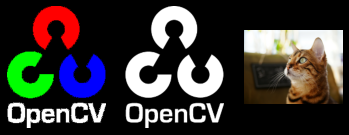

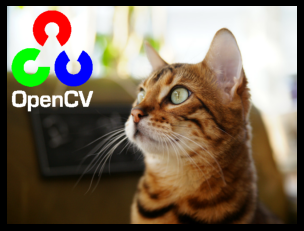

In [14]:
## 마스크 연산 수행하기 2
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
source = cv2.imread('./images/opencv-logo-white.png', cv2.IMREAD_UNCHANGED)
destination = cv2.imread('./images/cat.bmp')

# 색상 정보 순서 변경
source = cv2.cvtColor(source, cv2.COLOR_BGRA2RGBA)
destination = cv2.cvtColor(destination, cv2.COLOR_BGR2RGB)

mask_ = source[:, :, 3]  # 알파 채널
source = source[:, :, :-1]  # RGB 3채널
# source와 destination의 영상 크기가 같지 않기 때문에
# source 크기 만큼의 영역을 destination 영상에서 crop해 온다.
h, w = mask_.shape
# 후에 crop에 마스크 연산을 수행하면 destination 영상에도 영향을 끼친다.
crop = destination[10:10 + h, 10:10 + w]

# 출력
plt.subplot(131), plt.axis('off'), plt.imshow(source)
plt.subplot(132), plt.axis('off'), plt.imshow(mask_, cmap='gray')
plt.subplot(133), plt.axis('off'), plt.imshow(destination)
plt.show()

cv2.copyTo(source, mask_, crop)
plt.imshow(destination)
plt.axis('off')
plt.show()

## 4) OpenCV 그리기 함수

In [ ]:
import cv2
help(cv2.line)

In [ ]:
import cv2
help(cv2.rectangle)

In [ ]:
import cv2
help(cv2.circle)

In [ ]:
import cv2
help(cv2.polylines)

In [ ]:
import cv2
help(cv2.putText)

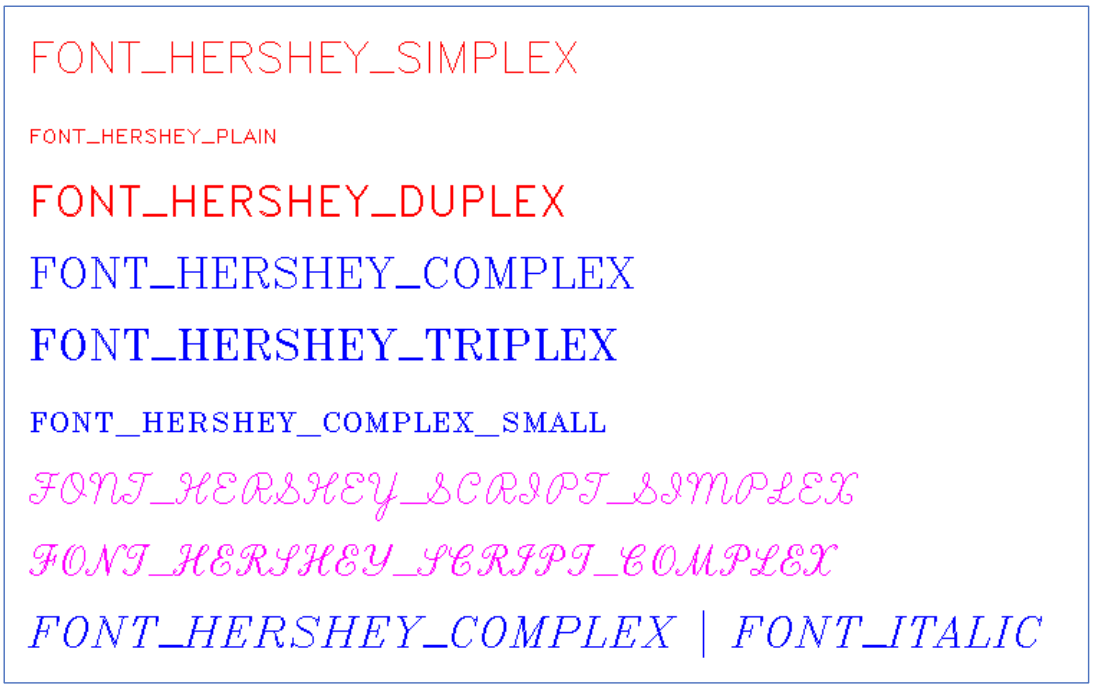

In [64]:
## OpenCV 그리기 함수
# OpenCV는 영상에 선, 도형, 문자열을 출력하는 그리기 함수를 제공한다.
# - 선 그리기 : 직선, 화살표, 마커 등
# - 도형 그리기 : 사각형, 원, 타언, 다각형 등
# - 문자열 출력

## 그리기 함수 사용 시 주의할 점
# 그리기 알고리즘을 이용하여 영상의 픽셀 값 자체를 변경한다.(영상 훼손)
# -> 원본 영상이 필요하면 복사본을 만들어서 그 위에 그리기 & 출력
# 그레이스케일 영상에는 컬러로 그리기가 안 된다.
# -> cv2.cvtColor() 함수로 BGR 컬러 영상으로 변환한 후 그리기 함수를 호출
# -> matplotlib 으로 출력할 시 RGB 컬러 영상으로 변환

## 직선 그리기
# cv2.line(img, pt1, pt2, color, thickness, lineType, shift) -> img
# img : image. 그림을 그릴 영상
# pt1 & pt2 : point. 직선의 시작점과 끝점. (x, y) 각각 튜플 형식
# color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
# thickness : 선 두께. 기본값은 1(px단위)
# lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
# shift : 그리기 좌표 값의 축소 비율. 기본값은 0

## 사각형 그리기
# cv2.rectangle(img, pt1, pt2, color, thickness, lineType, shift) -> img
# cv2.rectangle(img, rectangle, color, thickness, lineType, shift) -> img
# img : image. 그림을 그릴 영상
# pt1 & pt2 : point. 사각형의 두 꼭지점 좌표. (x, y) 각각 튜플 형식
# rectangle : 사각형의 위치 정보. (x, y, w, h) 튜플 형식
# color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
# thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
# lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
# shift : 그리기 좌표 값의 축소 비율. 기본값은 0

## 원 그리기
# cv2.circle(img, center, radius, color, thickness, lineType, shift) -> img
# img : image. 그림을 그릴 영상
# center : 원의 줌실점의 좌표. (x, y) 튜플 형식
# radius : 원의 반지름. 정수값
# color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
# thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
# lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
# shift : 그리기 좌표 값의 축소 비율. 기본값은 0

## 다각형 그리기
# cv2.polylines(img, points, isClosed, color, thickness, lineType, shift) -> img
# img : image. 그림을 그릴 영상
# pts : points. 다각형 외곽 점들의 좌표 배열. numpy.ndarra를 리스트 형식으로 감싸서 전달한다.
#        : 다각형 외곽 점들의 좌표 값은 시계 방향으로 지정한다.
#        : ex) [np.array([[10, 10], [50, 50], [10, 50]], dtype=np.int32)]
# isClosed : 폐곡선 여부. True or False로 지정.
#           -> True이면 마지막 꼭지점과 첫 번째 꼭지점을 연결 시킨다.
#           -> False이면 마지막 꼭지점과 첫 번째 꼭지점을 연결하지 않은 상태로 출력 한다.
# color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
# thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
# lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
# shift : 그리기 좌표 값의 축소 비율. 기본값은 0

## 문자열 출력
# cv2.putText(img, text, org, fontFace, fontScale, color, thickness,
#             lineType, bottomLeftOrigin) -> img
# img : image. 문자열을 그릴 영상
# text : 출력할 문자열
# org : origin. 영상에서 문자열을 출력할 위치의 좌측 하단 좌표. (x, y) 튜플 형식
# fontFace : 폰트 종류. cv2.FONT_HERSHEY_ 로 시작하는 상수 중 선택
# fontScale : 폰트 크기 확대/축소 비율(em단위)
# color : 선 색상 또는 밝기. (B, G, R) 튜플 또는 정수 값
# thickness : 선 두께. 기본값은 1(px단위). 음수(-1)를 지정하면 내부를 채운다.
# lineType : 선 타입. cv2.LINE_4, cv2.LINE_8, cv2.LINE_AA 중 선택. 기본값은 cv2.LINE_8
# bottomLeftOrigin : True이면 영상의 좌측 하단을 원점으로 간주. 기본값은 False
# 참고사항 : cv2.putText()에서 지원하는 fontface 상수와 실제 출력 모양
from IPython.display import Img
Img('./imgs/fontface.png')

새 그림판을 생성합니다.


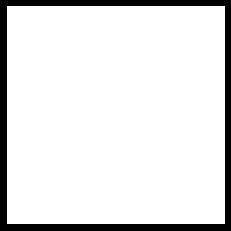

직선 2개가 생성되었습니다.


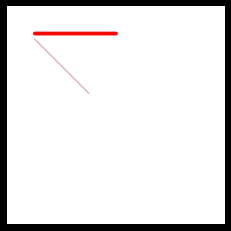

사각형 2개가 생성되었습니다.


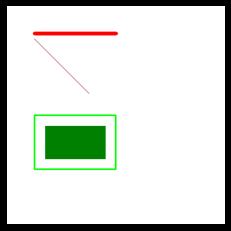

원 2개가 생성되었습니다.


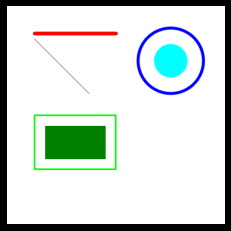

사다리꼴 도형이 생성되었습니다.


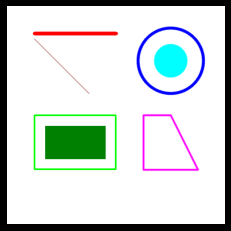

문구가 생성되었습니다.


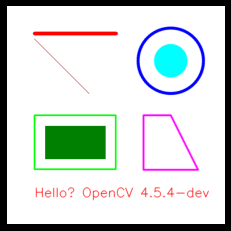

In [103]:
## 5개의 그리기 함수 예제를 통해 한 곳에 그려 넣어보기
import matplotlib.pyplot as plt
import numpy as np
import cv2

# 새 영상 생성하기(흰 색 그림판)
print('새 그림판을 생성합니다.')
image = np.full(shape=(400, 400, 3), fill_value=255, dtype=np.uint8)
plt.imshow(image)
plt.axis('off')
plt.show()

# 직선 그리기
print('직선 2개가 생성되었습니다.')
cv2.line(image, pt1=(50, 50), pt2=(200, 50), color=(255, 0, 0), thickness=5)
cv2.line(image, pt1=(50, 60), pt2=(150, 160), color=(128, 0, 0))
plt.imshow(image)
plt.axis('off')
plt.show()

# 사각형 그리기
print('사각형 2개가 생성되었습니다.')
cv2.rectangle(image, rec=(50, 200, 150, 100), color=(0, 255, 0), thickness=2)
cv2.rectangle(image, pt1=(70, 220), pt2=(180, 280), color=(0, 128, 0), thickness=-1)
plt.imshow(image)
plt.axis('off')
plt.show()

# 원 그리기
print('원 2개가 생성되었습니다.')
cv2.circle(image, center=(300, 100), radius=60, color=(0, 0, 255),
           thickness=3, lineType=cv2.LINE_AA)
cv2.circle(image, center=(300, 100), radius=30, color=(0, 255, 255),
           thickness=-1, lineType=cv2.LINE_AA)
plt.imshow(image)
plt.axis('off')
plt.show()

# 다각형 그리기
print("사다리꼴 도형이 생성되었습니다.")
pts_ = np.array([[250, 200], [300, 200], [350, 300], [250, 300]])  # 시계 방향으로 지정
cv2.polylines(image, pts=[pts_], isClosed=True, color=(255, 0, 255),
              thickness=2, lineType=cv2.LINE_AA)
plt.imshow(image)
plt.axis('off')
plt.show()

# 문자열 출력
print('문구가 생성되었습니다.')
text_ = 'Hello? OpenCV ' + cv2.__version__
cv2.putText(image, text=text_, org=(50, 350), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=.8, color=(255, 0, 0), lineType=cv2.LINE_AA)
plt.imshow(image)
plt.axis('off')
plt.show()

## 5) 카메라와 동영상 처리하기 1

In [ ]:
import cv2
help(cv2.VideoCapture.set)

In [ ]:
## cv2.VideoCapture 클래스
# OpenCV에서는 카메라와 동영상으로부터 프레임(frame)을 받아오는 작업을 cv2.VideoCapture 클래스 하나로 처리한다.

## 카메라 열기
# cv2.VideoCapture(index, apipreference) -> retval
# index : camera_id + domain_offset_id. 시스템 기본 카메라를 기본 방법으로 열려면 0을 전달
# apipreference : 선호하는 카메라 처리 방법을 지정
# retval : return value. cv2.VideoCapture 인스턴스(객체)
# cv2.VideoCapture.open(index, apiPreference) -> retval
# retval : return value. 성공하면 True, 실패하면 False

## 동영상, 정지 영상 시퀀스, 비디오 스트림 열기
# cv2.VideoCapture(filename, apipreference) -> retval
# filename : 비디오 파일이 있는 경로와 파일 이름. 그 외 정지 영상 시퀀스, 비디로 스트림 URL 등
# apipreference : 선호하는 동영상 처리 방법을 지정
# retval : return value. cv2.VideoCapture 인스턴스(객체)
# cv2.VideoCapture.open(filename, apipreference) -> retval
# retval : return value. 성공하면 True, 실패하면 False

## 비디오 캡쳐가 준비되었는지 확인
# cv2.VideoCapture.isOpened() -> retval
# retval : return value. 성공하면 True, 실패하면 False

## 프레임 받아 오기
# cv2.VideoCapture.read(image) -> retval, image
# retval : return value. 성공하면 True, 실패하면 False
# image : 현재 프레임(numpy.ndarray)

## 카메라, 비디로 장치 속성 값 참조
# cv2.VideoCapture.get(propId) -> retval
# propId : 속성 상수
# retval : return value. 성공하면 해당 속성 값, 실패하면 0
# cv2.VideoCapture.set(propId, value) -> retval
# propId : 속성 상수
# value : 속성 값
# retval : return value. 성공하면 True, 실패하면 False

# cv2.VedeoCapture.release() - 할당된 자원을 해제

### 속성 상수 Table [<OpenCV 문서 참고>](https://docs.opencv.org/4.1.0/d4/d15/group__videoio__flags__base.html#gaeb8dd9c89c10a5c63c139bf7c4f5704d "속성 상수")

|속성 상수|설명|
|:-|:-|
|CAP_PROP_FRAME_WIDTH|프레임 가로 크기|
|CAP_PROP_FRAME_HEIGHT|프레임 세로 크기|
|CAP_PROP_FPS|초당 프레임 수|
|CAP_PROP_FRAME_COUNT|비디로 파일의 총 프레임 수|
|CAP_PROP_POS_MSEC|밀리초 단위로 현재 위치|
|CAP_PROP_POS_FRAMES|현재 프레임 번호|
|CAP_PROP_EXPOSURE|노출|

※ CAP_PROP -> capture device property

※ POS -> position

In [8]:
## 카메라 처리 예제 - 시스템 기본 카메라 장치 열기
import sys
import cv2

# 카메라 장치 열기
# 인수를 0을 전달 함으로 시스템 기본 카메라 장치를 연다.
capture = cv2.VideoCapture(0)

# 예외 처리
if not capture.isOpened():
    print('Camera open failed!')
    sys.exit()

# 카메라 프레임 크기 출력
print('Frame width :', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height :', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))

# 카메라 프레임 크기 설정
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 320)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 240)

# 카메라 프레임 처리
# 카메라로부터 프레임을 정상적으로 받아오면 retval에는 True, frame에는 해당 프레임이 저장 된다.
while True:
    retval, frame = capture.read()
    
    if not retval:  # 반환 값이 False이면 멈춤
        break
    
    inversed = ~frame  # 현재 프레임 반전
    
    edge = cv2.Canny(frame, threshold1=50, threshold2=150)  # 윤곽선
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(10) == 27:  # esc키 누를 시 반복문 탈출
        break

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)


Frame width : 1280
Frame height : 720


-1

In [12]:
## 동영상 처리 예제 - 로컬 파일에서 비디오 열기
import sys
import cv2

# 비디오 파일 열기
capture = cv2.VideoCapture('./videos/video1.mp4')

# 예외 처리
if not capture.isOpened():
    print('Video open failed!')
    sys.exit()

# 비디오 프레임 크기, 전체 프레임수 출력
print('Frame width :', int(capture.get(cv2.CAP_PROP_FRAME_WIDTH)))
print('Frame height :', int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('Frame count :', int(capture.get(cv2.CAP_PROP_FRAME_COUNT)))

fps = round(capture.get(cv2.CAP_PROP_FPS))
# 초당 프레임 수 출력
print('FPS :', fps)
delay = round(1000 / fps)

# 비디오의 매 프레임 처리
while True:
    retval, frame = capture.read()
    
    if not retval:  # 반환 값이 False이면 멈춤
        break
    
    inversed = ~frame  # 동영상 반전
    
    edge = cv2.Canny(frame, threshold1=50, threshold2=150)  # 윤곽선
    
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(delay) == 27:  # esc키 누를 시 반복문 탈출
        break

capture.release()
cv2.destroyAllWindows()
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

Frame width : 1280
Frame height : 720
Frame count : 0
FPS : 29


-1

## 6) 카메라와 동영상 처리하기 2

In [ ]:
import cv2
help(cv2.VideoWriter)

In [ ]:
## cv2.VideoWriter 클래스
# OpenCV에서는 cv2.VideoWriter 클래스를 이용하여 일련의 프레임을 동영상 파일로 저장할 수 있다.
# 일련의 프레임은 모두 크기와 데이터 타입이 같아야 한다.

## Fourcc(4-문자 코드, four character code)
# 동영상 파일의 코덱, 압축 방식, 색상, 픽셀 포맷 등을 정의하는 정수 값(아래 테이블 참고)

### four character code

|종류|설명|
|:-|:-|
|cv2.VideoWriter_fourcc(*'DIVX')|DIVX MPEG-4 코덱|
|cv2.VideoWriter_fourcc(*'XVID')|XVID MPEG-4 코덱|
|cv2.VideoWriter_fourcc(*'FMP4')|FFMPEG MPEG-4 코덱|
|cv2.VideoWriter_fourcc(*'X264')|H.264/AVC 코덱|
|cv2.VideoWriter_fourcc(*'MJPG')|Motion-JPEG 코덱|

[https://www.fourcc.org/codecs.php](https://www.fourcc.org/codecs.php)


In [ ]:
## 저장을 위한 동영상 파일 열기
# cv2.VideoWriter(filename, fourcc, fps, frameSize, isColor) -> retval
# filename : 비디오 파일의 경로와 이름
# fourcc : 4-문자 코드(위 테이블 참고)
# fps : 초당 프레임 수
# frameSize : 프레임 크기(width, height) 튜플 형식
# isColor : 컬러 영상이면 True, 그렇지 않으면 False
#           -> 그레이스케일 영상을 저장할 때는 컬러 포맷(BGR)로 변환 후 저장해야 한다.
# retval : return value. cv2.VideoWriter 인스턴스(객체)
# cv2.VideoWriter(filename, fourcc, fps, frameSize, isColor) -> retval
# retval : return value. 성공하면 True, 실패하면 False

## 비디오 파일이 준비되었는지 확인
# cv2.VideoWriter.isOpened() -> retval
# retval : return value. 성공하면 True, 실패하면 False

## 프레임 저장하기
# cv2.VideoWriter.write(image) -> None
# image : 저장할 프레임(numpy.ndarray)

In [4]:
## 웹 카메라 입력을 동영상으로 저장하기
import sys
import cv2

# 시스템 기본 카메라로 장치 열기
capture = cv2.VideoCapture(0)

# 예외 처리 1
if not capture.isOpened():
    print("Camera open failed!")
    sys.exit()

# 비디오 프레임 크기 구하기
width = round(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = round(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# 초딩 프레임 수 / 딜레이 - 현재 프레임과 다음 프레임 사이의 시간 간격(밀리초 단위) 구하기
fps = round(capture.get(cv2.CAP_PROP_FPS))
delay_ = round(1000 / fps)

# 4-문자 코드 지정
fourcc = cv2.VideoWriter_fourcc(*'DIVX')  # *'DIVX' == 'D','I','V','X'

# 입력 받은 일련의 프레임을 담을 빈 동영상 상자 생성하기
out = cv2.VideoWriter("./videos/output.avi", fourcc, fps, (width, height))

# 예외 처리 2
if not out.isOpened():
    print("File open failed!")
    capture.release()
    sys.exit()

# 비디오의 매 프레임 처리
while True:
    # 프레임 받아 오기 성공 여부와 현재 프레임을 각각 변수에 할당
    retval, frame = capture.read()
    
    if not retval:  # 반환 값이 False이면 멈춤
        break
    
    inversed = ~frame  # 비디오 반전
    
    edge = cv2.Canny(image=frame, threshold1=50, threshold2=150)  # 윤곽선
    # 윤곽선을 검출한 edge 영상은 그레이스케일 영상이기 때문에 컬러 영상으로 변환해야 저장 된다.
    edge_color = cv2.cvtColor(edge, cv2.COLOR_GRAY2BGR)
    
    out.write(edge_color)  # 받아온 프레임을 빈 동영상 상자에 넣기
    
    # 3가지 효과를 3개의 창에 띄움
    cv2.imshow('frame', frame)
    cv2.imshow('inversed', inversed)
    cv2.imshow('edge', edge)
    
    if cv2.waitKey(delay=delay_) == 27:  # esc 누를 시 반복문 탈출
        break

capture.release()  # 할당된 자원을 해제
out.release()  # 동영상 상자를 닫음
cv2.destroyAllWindows()  # 생성된 모든 창 제거
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)
cv2.waitKey(1)

-1

## 7) 키보드 이벤트 처리하기

In [ ]:
## 키보드 입력 대기 함수
# cv2.waitkey(delay) -> retval
# delay : 밀리초 단위 대기 시간. delay ≤ 0 이면 무한히 기다린다. 기본값은 0
# retval : return value. 눌린 키 값(ASCII code). 키가 눌리지 않으면 -1
# 참고사항 :
#       - cv2.waitKey() 함수는 OpenCV 창이 하나라도 있을 때만 동작한다.
#       - 특정 키 입력을 사용하려면 ord() 함수를 이용

## 키보드 특수키 입력 처리하기
# Windows 운영체제에서 방향키, 함수키 등의 특수키 입력은 cv2.waitkeyEx() 함수를 사용한다.(아래 테이블 참고)

### 주요 특수 키에 해당하는 waitKeyEx() 함수 반환값

|특수 키|waitkeyEx() 반환값|특수 키|waitkeyEx() 반환값|
|:-|:-|:-|:-|
|Insert|0x2d0000|F1|0x700000|
|Delete|0x2e0000|F2|0x710000|
|Page Up|0x210000|F3|0x720000|
|Page Down|0x220000|F4|0x730000|
|End|0x230000|F5|0x740000|
|Home|0x240000|F6|0x750000|
|←|0x250000|F7|0x760000|
|↑|0x260000|F8|0x770000|
|→|0x270000|F9|0x780000|
|↓|0x280000|F10|0x790000|
|||F11|0x7a0000|
|||F12|0x7b0000|

In [12]:
## 키보드에서 "i" 또는 "I" 키를 누르면 영상을 반전 시키기
import sys
import cv2

image = cv2.imread("./images/cat.bmp", cv2.IMREAD_GRAYSCALE)

cv2.imshow("image", image)

while True:
    # cv2.waitKey() 함수를 변수에 저장하지 않고 if와 elif에 두 번 사용하게 되면
    # 컴퓨터에서 cv2.waitKey() 함수를 각각의 조건문에서 한 번씩 입력을 받아
    # 총 두 번의 입력을 받아야지만 모든 조건문이 실행되기 때문에 아를 해결하기 위해
    # cv2.waitKey() 함수를 변수에 할당하여 사용하면 한 번의 입력으로 조건에 따라
    # 두 가지 실행을 할 수 있게 된다.
    keycode = cv2.waitKey()
    if keycode == ord('i') or keycode == ord('I'):
        image = ~image
        cv2.imshow("image", image)
    elif keycode == 27:
        break

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 8) 마우스 이벤트 처리하기

In [ ]:
import cv2
help(cv2.setMouseCallback)

In [ ]:
# OpenCV에서 cv2.namedWindow() 함수 혹은 cv2.imshow() 함수를 이용해 가상 윈도우 창을 만들 때,
# 그 창에 대한 일반적인 이벤트 처리가 가능한데 이는 마우스가 움직일 때도 다양한 마우스 이벤트가 발생한다.
# 다만 그 마우스 이벤트들이 거의 무시가 되는데, 원한다면 마우스 이벤트를 사용자에게 다시 되돌려 주도록
# OpenCV 라이브러리에 요청을 할 수 있다. 그 요청을 하는 함수가 바로 cv2.setMouseCallback()함수 이다.
# 이 함수는 내가 띄운 가상 윈도우 창에서 발생하는 어떤 마우스 이벤트를 사용자 임의대로 처리를 하고 싶을 때
# 사용자가 등록한 사용자 정의 콜백함수를 호출하여 그 함수의 실행문을 실행해주는 함수이다.

## 마우스 이벤트 콜백함수 등록 함수
# cv2.setMouseCallback(windowName, onMouse, param) -> None
# windowName : 마우스 이벤트 처리를 수행할 창 이름
# onMouse : 마우스 이벤트 처리를 위한 콜백 함수 이름
#         : 마우스 이벤트 콜백 함수는 다음 형식을 따라야 한다.
#         : onMouse(event, x, y, flags, param) -> None
# param : 콜백 함수에 전달할 데이터

## 마우스 이벤트 처리 함수(콜백 함수) 형식
# onMouse(event, x, y, flags, param) -> None
# event : 마우스 이벤트 종류. cv2.EVENT_ 로 시작하는 상수
# x : 마우스 이벤트가 발생한 x 좌표
# y : 마우스 이벤트가 발생한 y 좌표
# flags : 마우스 이벤트 발생 시 상태. cv2.EVENT_FLAG_ 로 시작하는 상수
# param : cv2.setMouseCallback() 함수에서 설정한 데이터

### 마우스 이벤트 처리 함수의 event 인수(상수)

|MouseEventTypes 열거형 상수|값|설명|
|:-|--|:-|
|cv2.EVENT_MOUSEMOVE|0|마우스가 창 위에서 움직이는 경우|
|cv2.EVENT_LBUTTONDOWN|1|마우스 왼쪽 버튼이 눌려지는 경우|
|cv2.EVENT_RBUTTOMDOWN|2|마우스 오른쪽 버튼이 눌려지는 경우|
|cv2.EVENT_MBUTTONDOWN|3|마우스 가운데 버튼이 눌려지는 경우|
|cv2.EVENT_LBUTTONUP|4|마우스 왼쪽 버튼이 떼어지는 경우|
|cv2.EVENT_RBUTTONUP|5|마우스 오른쪽 버튼이 떼어지는 경우|
|cv2.EVENT_MBUTTONUP|6|마우스 가운데 버튼이 떼어지는 경우|
|cv2.EVENT_LBUTTONDBLCLK|7|마우스 왼쪽 버튼을 더블클릭하는 경우|
|cv2.EVENT_RBUTTONDBLCLK|8|마우스 오른쪽 버튼을 더블클릭하는 경우|
|cv2.EVENT_MBUTTONDBLCLK|9|마우스 가운데 버튼을 더블클릭하는 경우|
|cv2.EVENT_MOUSEWHEEL|10|마우스 휠을 앞뒤로 돌리는 경우|
|cv2.EVENT_MOUSEHWHEEL|11|마우스 휠을 좌우로 움직이는 경우|

### 마우스 이벤트 처리 함수의 flags 인수(상수)

|MouseEventFlags 열거형 상수|값|설명|
|:-|--|:-|
|cv2.EVENT_FLAG_LBUTTON|1|마우스 왼쪽 버튼이 눌려져 있음|
|cv2.EVENT_FLAG_RBUTTON|2|마우스 오른쪽 버튼이 눌려져 있음|
|cv2.EVENT_FLAG_MBUTTON|4|마우스 가운데 버튼이 눌려져 있음|
|cv2.EVENT_FLAG_CTRLKEY|8|CTRL 키가 눌려져 있음|
|cv2.EVENT_FLAG_SHIFTKEY|16|SHIFT 키가 눌려져 있음|
|cv2.EVENT_FLAG_ALTKEY|32|ALT 키가 눌려져 있음|

In [8]:
## 마우스를 이용해 그림 만들기
import sys
import cv2
import numpy as np

old_x = old_y = -1

def on_mouse(event, x, y, flags, param):
    global img_, old_x, old_y
    
    # if event == cv2.EVENT_LBUTTONDOWN:
    #     print(f"EVENT_LBUTTONDOWN : {x}, {y}")  # 마우스 왼쪽 버튼을 클릭할 시 좌표를 출력
    # elif event == cv2.EVENT_LBUTTONUP:
    #     print(f"EVENT_LBUTTONUP : {x}, {y}")  # 마우스 왼쪽 버튼을 뗄 시 좌표를 출력
    # elif event == cv2.EVENT_MOUSEMOVE:
    #     if flags & cv2.EVENT_FLAG_LBUTTON:
    #         print(f"EVENT_MOUSEMOVE : {x}, {y}")  # 마우스를 클릭한 상태로 움직일 시 좌표를 출력
    if event == cv2.EVENT_LBUTTONDOWN:
        old_x, old_y = x, y
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags and cv2.EVENT_FLAG_LBUTTON:
            # cv2.circle(img_, (x, y), 5, (0, 0, 255), -1, cv2.LINE_AA)
            cv2.line(img_, (old_x, old_y), (x, y), (0, 0, 255), 4, cv2.LINE_AA)
            cv2.imshow("image", img_)
            old_x, old_y = x, y

img_ = np.ones((480, 640, 3), np.uint8) * 255

cv2.namedWindow("image")
# 마우스 이벤트 콜백 함수는 OpenCV 가상 윈도우 창이 열려 있는 상태에서 호출해야 되기 때문에
# cv2.namesWindow() 함수 혹은 cv2.imshow() 함수보다 밑에 작성해야 한다.
cv2.setMouseCallback("image", on_mouse)
cv2.imshow("image", img_)
cv2.waitKey()

cv2.destroyAllWindows()
cv2.waitKey(1)

-1

## 9) 트랙바 사용하기

## 10) 연산 시간 측정 방법

## 11) 동영상 전환 이펙트